# Języki skryptowe - Python
## Wykład 7

---

* Bilioteka standardowa
    * os
    * sys
    * time / datetime
    * random
* Liczby pseudolosowe

## Moduł *os*

---

* przenośne używanie funkcjonalności zależnych od systemu operacyjnego
    * operacje na plikach (o tym za tydzień)
    * operacje na ścieżkach
    * uruchamianie poleceń systemowych
    * zarządzanie zmiennymi środowiskowymi
    * ...

## System operacyjny

---

In [1]:
import os

# POSIX = Portable Operating System Interface for Unix
os.name # posix, nt, ce, java

'posix'

In [2]:
if os.name == "posix": # jeśli unix
    cmd = "ls"         # użyj ls
elif os.name == "nt":  # jeśli windows
    cmd = "dir"        # użyj dir
    
print(cmd)

ls


## Katalog roboczy

---

In [3]:
current_path = os.getcwd() # pwd

print("Katalog roboczy:", current_path)

new_path = "/home/goran"

os.chdir(new_path) # zmień katalog roboczy

print("Nowy katalog roboczy:", os.getcwd())

os.chdir(current_path) # wracamy

Katalog roboczy: /doc/insync/scratch/zajęcia/2016/języki skryptowe - python/js-python
Nowy katalog roboczy: /home/goran


## Zawartość katalogu

---

In [4]:
os.listdir("/usr/") # lista plików i katalogów

['src', 'local', 'bin', 'include', 'sbin', 'lib', 'games', 'share', 'locale']

In [5]:
os.listdir() # lista plików i katalogów w pwd

['my_script.py',
 'usos.py',
 '.ipynb_checkpoints',
 'js-python_w05.html',
 'js-python_w01.html',
 'js-python_l02.md',
 'test.2016_11_11_175921.log',
 'js-python_w04.ipynb',
 'js-python_w06.html',
 'README.md',
 'js-python_w03.html',
 'test.2016_11_11_175922.log',
 'js-python_l00.md',
 'iloczyn.py',
 'js-python_w04.html',
 'temp.py',
 'js-python_w03.ipynb',
 'js-python_l01.pdf',
 'js-python_w05.ipynb',
 'print_args.py',
 'src',
 'js-python_l01.md',
 'middle2.py',
 'js-python_w01.ipynb',
 'listy_zadan',
 '__pycache__',
 'dodaj_studentow.py',
 'js-python_w07.ipynb',
 'test.2016_11_11_175942.log',
 'js-python_w02.ipynb',
 'js-python_w02.html',
 'temp',
 'my_module.py',
 'js-python_w06.ipynb',
 'private.py']

## Tworzenie / usuwanie katalogów

---

In [6]:
def check(ls, folder):
    """Sprawdza czy folder znajduje się na liście."""
    if folder in ls:
        print("{} is found.".format(folder))
    else:
        print("{} not found.".format(folder))

my_folder = "test"

check(os.listdir(), my_folder)

os.mkdir(my_folder) # stwórz katalog test

check(os.listdir(), my_folder)

os.rmdir(my_folder) # usuń katalog test

check(os.listdir(), my_folder)

test not found.
test is found.
test not found.


## Tworzenie / usuwanie plików

---

In [7]:
os.mkdir("my_dir") # stwórz katalog "my_dir"

# otwórz plik w trybie zapisu (więcej za tydzień)
file = open("my_dir/my_file", 'w')
file.close()

os.listdir("my_dir")

['my_file']

In [8]:
# nie można usunąć niepustego katalogu
os.rmdir("my_dir") # OSError: [Errno 39] Directory not empty: 'my_dir'

OSError: [Errno 39] Directory not empty: 'my_dir'

In [9]:
os.remove("my_dir/my_file") # usuń plik
os.rmdir("my_dir")          # usuń katalog

## Drzewo katalogów

---

In [10]:
# os.makedirs(..., exist_ok=True) -> działa jak mkdir -p
os.makedirs("level0/level1/level2") # utwórz "ciąg" katalogów

os.listdir("level0")

['level1']

In [11]:
os.listdir("level0/level1")

['level2']

In [12]:
# os.rmdir("level0/level1/level2")    # usunie tylko level2
os.removedirs("level0/level1/level2") # usunie wszystko

## Moduł *os.path*

---

In [13]:
import os

path = "/my/path" # katalog
file = "file.py"  # plik

os.path.join(path, file) # tworzy pełną ścieżkę do pliku

'/my/path/file.py'

In [14]:
os.path.split("/my/path/file.py") # zwraca (head, tail)

('/my/path', 'file.py')

In [15]:
os.path.dirname("/my/path/file.py") # zwraca split()[0]

'/my/path'

In [16]:
os.path.basename("/my/path/file.py") # zwraca split()[1]

'file.py'

## Więcej o *os.path*

---

In [17]:
import os.path as path

path.splitext("/my/path/file.py") # wydziela rozszerzenie pliku

('/my/path/file', '.py')

In [18]:
my_path, my_file = path.split("/my/path/file.py")
my_base, my_extn = path.splitext(my_file)

print("my_path =", my_path)
print("my_file =", my_file)
print("my_base =", my_base)
print("my_extn =", my_extn)

my_path = /my/path
my_file = file.py
my_base = file
my_extn = .py


## Zmienne środowiskowe

---

In [19]:
os.getenv("HOME") # pobierz wartość zmiennej środowiskowej

'/home/goran'

In [20]:
os.environ["HOME"] # environ -> słownik zś

'/home/goran'

In [21]:
os.environ["MOJA_ZMIENNA"] = "To musi być string"

In [22]:
%%bash
# wywołanie komendy basha z poziomu jupytera
echo $MOJA_ZMIENNA

To musi być string


## USOS 

---

In [23]:
%%writefile usos.py
"""Uniwersytecki System Obsługi Studiów

Dane przechowywane w postaci: kierunek/rok/imie.nazwisko
a w pliku zapisany jest numer indeksu
"""

import os

# top-level katalog na podstawie zmiennej środowiskowej $USOS
# jeśli nie jest zdefiniowana -> bieżący katalog
_BASE_PATH = os.getenv("USOS") or os.getcwd()

Overwriting usos.py


## Zmienna środowiskowa USOS

---

In [24]:
%%bash
echo $USOS
python -c "import usos; print(usos._BASE_PATH)"


/doc/insync/scratch/zajęcia/2016/języki skryptowe - python/js-python


In [25]:
%%bash
export USOS="/moja/sciezka/do/bazy/danych"
python -c "import usos; print(usos._BASE_PATH)"

/moja/sciezka/do/bazy/danych


## USOS - dodawanie studenta

---

In [26]:
%%writefile -a usos.py

def add_student(imie, nazwisko, indeks, kierunek, rok):
    """Dodaje studenta.
    
    Tworzy plik imie.nazwisko w katalogu kierunek/rok/
    i umieszcza w nim numer indeksu
    """
    # pełna ścieżka do katalogu danego kierunku/rocznika
    path = os.path.join(_BASE_PATH, kierunek, str(rok))
    # imie.nazwisko
    file = ".".join([imie, nazwisko])
    # stwórz kierunek lub pomiń jeśli istnieje
    os.makedirs(path, exist_ok=True)
    # o plikach więcej za tydzień
    with open(os.path.join(path, file), 'w') as f:
        f.write(str(indeks))

Appending to usos.py


## USOS - przykład

---

In [27]:
%%writefile dodaj_studentow.py

import usos
import random

imiona = ["Kasia", "Basia", "Marek", "Darek"]
nazwiska = ["Nowak", "Marian", "Python"]
kierunki = ["ISSP", "Fizyka Komputerowa"]

for i in range(10):
    imie = random.choice(imiona)         # losowe imie
    nazwisko = random.choice(nazwiska)   # losowe nazwisko
    indeks = random.randint(1000, 9999)  # losowy indeks
    rocznik = random.randint(2015, 2017) # losowy rocznik
    kierunek = random.choice(kierunki)   # losowy kierunek
    
    usos.add_student(imie, nazwisko, indeks, kierunek, rocznik)

Overwriting dodaj_studentow.py


## USOS - wynik

---

In [30]:
%%bash
export USOS=/home/goran/usos
python dodaj_studentow.py
tree $USOS

/home/goran/usos
├── Fizyka Komputerowa
│   ├── 2015
│   │   └── Marek.Python
│   ├── 2016
│   │   ├── Basia.Marian
│   │   ├── Kasia.Nowak
│   │   └── Marek.Python
│   └── 2017
│       └── Basia.Marian
└── ISSP
    ├── 2015
    │   └── Marek.Marian
    ├── 2016
    │   ├── Basia.Marian
    │   ├── Kasia.Nowak
    │   └── Kasia.Python
    └── 2017
        └── Basia.Nowak

8 directories, 10 files


## *os.walk*

---

In [31]:
# os.walk "podróżuje po drzewie katalogów"
# na każdym kroku zwracając krotkę
# (obecny katalog, lista podkatalogów, lista plików)
for root, dirs, files in os.walk("/home/goran/usos"):
    print(root, dirs, files, sep="\n", end="\n\n")

/home/goran/usos
['Fizyka Komputerowa', 'ISSP']
[]

/home/goran/usos/Fizyka Komputerowa
['2016', '2015', '2017']
[]

/home/goran/usos/Fizyka Komputerowa/2016
[]
['Kasia.Nowak', 'Basia.Marian', 'Marek.Python']

/home/goran/usos/Fizyka Komputerowa/2015
[]
['Marek.Python']

/home/goran/usos/Fizyka Komputerowa/2017
[]
['Basia.Marian']

/home/goran/usos/ISSP
['2016', '2015', '2017']
[]

/home/goran/usos/ISSP/2016
[]
['Kasia.Python', 'Kasia.Nowak', 'Basia.Marian']

/home/goran/usos/ISSP/2015
[]
['Marek.Marian']

/home/goran/usos/ISSP/2017
[]
['Basia.Nowak']



## *os.walk*

---

In [32]:
for root, dirs, files in os.walk("/home/goran/usos"):
    for file in files: # pętla po plikach w danym katalogu root
        print(os.path.join(root, file))

/home/goran/usos/Fizyka Komputerowa/2016/Kasia.Nowak
/home/goran/usos/Fizyka Komputerowa/2016/Basia.Marian
/home/goran/usos/Fizyka Komputerowa/2016/Marek.Python
/home/goran/usos/Fizyka Komputerowa/2015/Marek.Python
/home/goran/usos/Fizyka Komputerowa/2017/Basia.Marian
/home/goran/usos/ISSP/2016/Kasia.Python
/home/goran/usos/ISSP/2016/Kasia.Nowak
/home/goran/usos/ISSP/2016/Basia.Marian
/home/goran/usos/ISSP/2015/Marek.Marian
/home/goran/usos/ISSP/2017/Basia.Nowak


## Moduł *glob*

---

* umożliwia wykorzystanie uniksowych *dzikich kart*: `?`, `*`, `[]`

In [33]:
import glob

glob.glob("*.ipynb") # lista plików z rozszerzeniem ipynb

['js-python_w04.ipynb',
 'js-python_w03.ipynb',
 'js-python_w05.ipynb',
 'js-python_w01.ipynb',
 'js-python_w07.ipynb',
 'js-python_w02.ipynb',
 'js-python_w06.ipynb']

## Więcej o *glob*

---

In [34]:
# pliki z roszerzeniem html oraz
# pasujące do wzorca (coś)(cyfra od 0 do 3)
glob.glob("*[0-3].html")

['js-python_w01.html', 'js-python_w03.html', 'js-python_w02.html']

In [35]:
glob.glob("js-python_?02.*") # js-python_[znak]02.[cokolwiek]

['js-python_l02.md', 'js-python_w02.ipynb', 'js-python_w02.html']

In [36]:
glob.glob("js-python_?02.[mi]*") # js-python_[znak]02.[m lub i]cokolwiek

['js-python_l02.md', 'js-python_w02.ipynb']

## Moduł *sys*

---

* funkcje i parametry specyficzne dla systemu operacyjnego
* ostatnio: ścieżka dostępu do modułów *sys.path*
* referencje do obiektów
* argumenty wywołania skryptu

## Referencje do obiektu

---

In [37]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [38]:
import sys

x = 1234
y = 1234
z = "Mój tekst"

sys.getrefcount(x) # x, y i ?

3

In [39]:
sys.getrefcount(z) # getrefcount pracuje na kopii z 

2

## Referencje do obiektów *mutowalnych*

---

In [40]:
x = [1, 2, 3]
y = x
z = x.copy()

sys.getrefcount(x) # x, y i getrefcount

3

In [41]:
x is y # x i y wskazują to samo

True

In [42]:
x is z # x i z wskazują na inne listy

False

## Argumenty 

---

In [43]:
%%writefile print_args.py
"""Drukuje argumenty podane w linii komend."""

import sys

# sys.argv - lista argumentó linii komend
for i, arg in enumerate(sys.argv):
    print("{}. {}".format(i, arg))

Overwriting print_args.py


In [44]:
!python print_args.py arg1 arg2 33 "hello world"

0. print_args.py
1. arg1
2. arg2
3. 33
4. hello world


## Przykład

---

In [45]:
%%writefile iloczyn.py
"""Liczy iloczyn podanych argumentów."""

import sys

if len(sys.argv) < 2: # sys.argv[0] = iloczyn.py
    print("Musisz podać co najmniej jedną liczbę .")
else:
    wyrazenie = "*".join(sys.argv[1:])
    print(wyrazenie, "=", eval(wyrazenie))

Overwriting iloczyn.py


In [46]:
!python iloczyn.py

Musisz podać co najmniej jedną liczbę .


In [47]:
!python iloczyn.py 1 2 5 4 10 0.5

1*2*5*4*10*0.5 = 200.0


## Moduł *time*

---

* operacje na czasie
* nie wszystkie funkcjonalności są dostępne na wszystkich platformach
* najczęściej wywoływane są funkcje biblioteki C o tej samej nazwie

## Czas uniksowy

---

In [48]:
import time

time.gmtime() # Greenwhich Mean Time / czas uniwersalny

time.struct_time(tm_year=2016, tm_mon=11, tm_mday=14, tm_hour=17, tm_min=43, tm_sec=9, tm_wday=0, tm_yday=319, tm_isdst=0)

In [49]:
time.time() # ile minęło sekund od

1479145391.2862186

In [50]:
time.gmtime(0) # eoki Uniksa

time.struct_time(tm_year=1970, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=1, tm_isdst=0)

## Przybliżony test

---

In [51]:
time.time() / 60 / 60 / 24 / 365 # lat

46.90339274137039

In [52]:
time.gmtime()[0] - time.gmtime(0)[0] # rok teraz - rok epoki linuksa

46

## Uniksowe chwile godne uwagi

---

In [53]:
time.gmtime(1000000000)[:6] # Unix billenium

(2001, 9, 9, 1, 46, 40)

In [54]:
time.gmtime(1234567890)[:6] # piątek 13-tego

(2009, 2, 13, 23, 31, 30)

![](src/unix1234567890.gif)

In [55]:
time.gmtime(0xFFFFFFFF)[:6] # max bez znaku (32-bit)

(2106, 2, 7, 6, 28, 15)

In [56]:
time.gmtime(0x7FFFFFFF)[:6] # max ze znakiem (32-bit)

(2038, 1, 19, 3, 14, 7)

## Czas lokalny

---

In [57]:
time.localtime() # czas lokalny

time.struct_time(tm_year=2016, tm_mon=11, tm_mday=14, tm_hour=18, tm_min=43, tm_sec=19, tm_wday=0, tm_yday=319, tm_isdst=0)

In [58]:
time.localtime()[3] - time.gmtime()[3] # różnica Polska - GMT

1

## Czas w formie czytelnej

---

In [59]:
teraz = time.localtime()

time.strftime("%c", teraz) # lub time.asctime(teraz)

'Mon Nov 14 18:43:22 2016'

In [60]:
dzien_tygodnia = time.strftime("%A", teraz) # %a - skrót

print("Dzisiaj jest", dzien_tygodnia)

Dzisiaj jest Monday


In [61]:
time.strftime("%Y-%m-%d %H:%M", teraz) # ROK-MIESIĄC-DZIEŃ GODZINA:MINUTA

'2016-11-14 18:43'

* pełna lista dyrektyw [tutaj](https://docs.python.org/3.6/library/time.html#time.strftime)

## Pomiar czasu (*wall time*)

---

In [62]:
import time

def poczekalnia(n):
    """Czeka n sekund."""
    time.sleep(n)
    
przed = time.time() # czas przed wywołaniem funkcji

poczekalnia(2)

po = time.time() # czas po wywołaniu funkcji

print("Czekałem {} sekund.".format(po - przed))

Czekałem 2.002260446548462 sekund.


## Pomiar czasu procesora (*process time*)

---

In [63]:
import time

def poczekalnia(n):
    """Czeka n sekund."""
    time.sleep(n)
    
przed = time.clock() # czas przed wywołaniem funkcji

poczekalnia(2)

po = time.clock() # czas po wywołaniu funkcji

print("Czekałem {} sekund.".format(po - przed))

Czekałem 0.0015890000000000626 sekund.


## Moduł *datetime*

---

* wygodniejszy w użyciu do zarządzania czasem i datą
* arytmetyka czasu i daty, np.

In [64]:
import datetime

t0 = datetime.datetime.now()
t1 = datetime.datetime(2017, 2, 4) # początek sesji

print(t1 - t0)

81 days, 5:16:24.258938


## Przykład

---

In [65]:
teraz = datetime.datetime.now()
uniks_end = datetime.datetime(2038, 1, 19, 3, 14, 7)

print("teraz =", teraz)
print("rok =", teraz.year)
print("miesiąc =", teraz.month)
print("dzień =", teraz.day)
print("Do końca uniksa zostało", uniks_end - teraz)

teraz = 2016-11-14 18:43:37.185897
rok = 2016
miesiąc = 11
dzień = 14
Do końca uniksa zostało 7735 days, 8:30:29.814103


## Przykład - logi

---

In [66]:
import os
from datetime import datetime

def create_log(log_path, process):
    """Tworzy unikatowy log."""
    timestamp = datetime.now().strftime('%Y_%m_%d_%H%M%S')
    filename = ".".join([process, timestamp, "log"])
    with open(os.path.join(log_path, filename), 'w+') as f:
        f.write("Uruchomiono proces.")

create_log(os.getcwd(), "test")

In [67]:
%%bash
ls -l *.log

-rw-rw-r-- 1 goran goran 19 lis 11 17:59 test.2016_11_11_175921.log
-rw-rw-r-- 1 goran goran 19 lis 11 17:59 test.2016_11_11_175922.log
-rw-rw-r-- 1 goran goran 19 lis 11 17:59 test.2016_11_11_175942.log
-rw-rw-r-- 1 goran goran 19 lis 14 18:43 test.2016_11_14_184342.log


## Generatory liczb pseudolosowych

---

* nie jest możliwe wygenerowanie liczby prawdziwie losowej
* możliwe jest wygenerowanie (na bazie liczby wejściowej, *seed*) ciągu liczb pseudolosowych
    * ten sam *seed* = ten sam ciąg
    * maksymalna ilość ciągów = możliwe *seedy*
    * okresowość

## *Middle square method*

---

<img src="src/Eniac.jpg" style="float: right; width: 50%;">

* stworzony przez Johna von Neumanna
* Wykorzystany w
    * ENIAC (jeden z pierwszych komputerów na świecie)
    * Projekt Manhattan

## *Middle square method* - algorytm

---

* weź liczbę 4-cyfrową jako *seed* (w ogólności można wziać *n*-cyfrową liczbę)
* podnieś do kwadratu, aby otrzymać liczbę 8-cyfrową (dodaj zera, jeśli trzeba)
* 4 środkowe cyfry są wynikiem i *seedem* dla następnej liczby

$$1111^2 = 01234321 \rightarrow 2343$$
$$2343^2 = 05489649 \rightarrow 4896$$
$$4896^2 = 23970816 \rightarrow 9708$$

## *Middle square method* - implementacja

---

In [68]:
%%writefile middle2.py
"""PRNG using middle-square method."""

def _middle2(n):
    """Return next random number."""
    return int(str(n*n).zfill(8)[2:6])

def generate(n, seed=1111):
    """Generate n numbers starting with seed."""
    numbers = []
    for _ in range(n):
        numbers.append(seed)
        seed = _middle2(seed)
    return numbers

Overwriting middle2.py


## *Middle square method* - wyniki

---

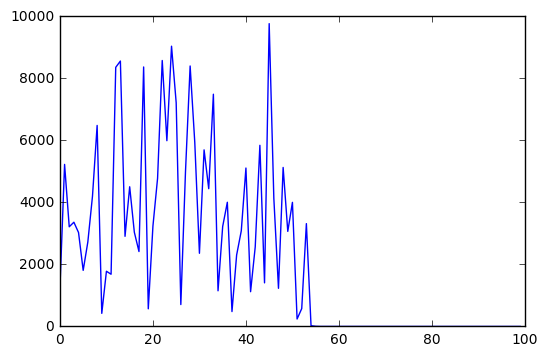

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import middle2

size, seed = 100, 1234

x, y = range(size), middle2.generate(size, seed)

plt.plot(x, y)

## Algorytm LCG

---

* LCG = linear congruential generator
* zaimplementowany w wielu językach
* prosty i szybki
* silne korelacje - nie nadaje się do symulacji Monte Carlo (i tym bardziej kryptografii)

$$X_{n+1} = (aX_n + c) \text{ mod } m$$

## Algorytm LCG - implementacja

---

In [70]:
def lcg(seed, m, a, c):
    """Return next random number using LCG."""
    return (seed * a + c) % m

size, seed = 100, 1234
a, c, m = 48271, 0, 2**32 - 1 # C++11 minst_rand

random_numbers = []

for _ in range(size):
    seed = lcg(seed, m, a, c)
    random_numbers.append(seed)

## Algorytm LCG - wyniki

---

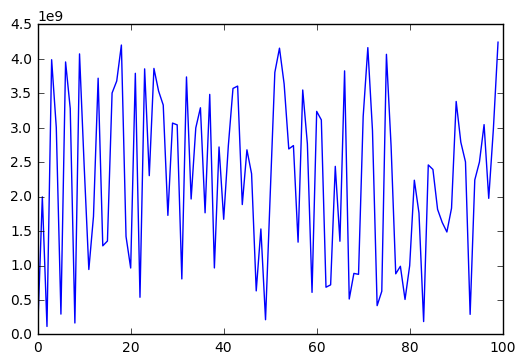

In [71]:
import matplotlib.pyplot as plt

x = range(size)

plt.plot(x, random_numbers)

## Algorytm LCG - korelacje

---

In [72]:
# Mathematics and Computers in Simulations 46 (1998) 485-505
seed = 1
a = 65539
c = 0
m = 2**31

punkty = [] # losowe punkty

for _ in range(9600):
    seed = lcg(seed, m, a, c)
    punkty.append(seed)
    
x = punkty[::3]  # współrzędne x
y = punkty[1::3] # współrzędne y
z = punkty[2::3] # współrzędne z

## Algorytm LCG - punkty 3D

---

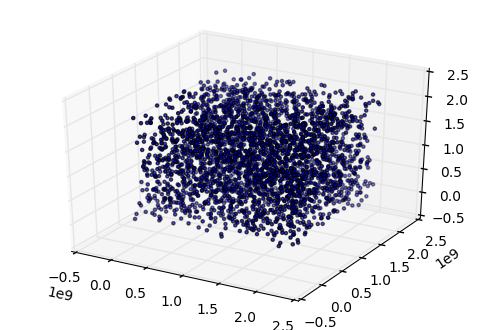

In [73]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from time import sleep

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, marker='.')

## Algorytm LCG - punkty 3D

---

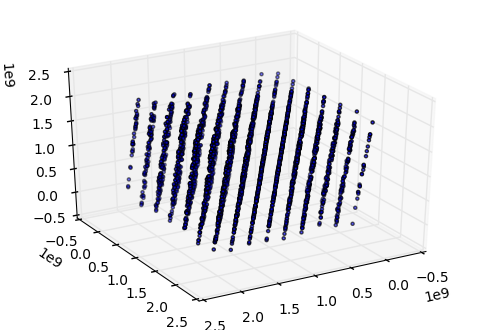

In [74]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.view_init(30, 60)

ax.scatter(x,y,z, marker='.')

## Moduł *random*

---

* generator Mersenne Twister
* zaniedbywalna korelacja między kolejnymi liczbami (dobry do symulacji Monte Carlo)
* przewidywalność (nie nadaje się do kryptografii)
* szybki, ale "nieelegancki"

## Losowe liczby zmiennoprzecinkowe

---

In [75]:
import random

# random.random() -> losowa liczba z [0, 1)

losowe = [random.random() for _ in range(10)]

print(losowe)

[0.2698846730753022, 0.39646893011652196, 0.3569316622351202, 0.7422356288778353, 0.9872672338526717, 0.8037923911064603, 0.8702317548225692, 0.4956627050929412, 0.3254081126694237, 0.3929978024317329]


In [76]:
# random.uniform(a, b) -> losowa z przedziału [a, b]

losowe = [random.uniform(99, 100) for _ in range(10)]

print(losowe)

[99.99533728109901, 99.59952026049403, 99.42567811786209, 99.78233290994207, 99.84681728147966, 99.53305937003043, 99.47972787766165, 99.94064273021912, 99.8788743089142, 99.76186755697995]


## Losowe liczby całkowite

---

In [77]:
import random

# random.randint(a, b) - losowa całkowita z [a, b]

losowe = [random.randint(1, 10) for _ in range(10)]

print(losowe)

[4, 3, 7, 2, 5, 3, 6, 6, 5, 1]


In [78]:
# random.randrange(stop) -> losowa < stop
# random.randrange(start, stop[, step])

losowe = [random.randrange(10) for _ in range(10)]

print(losowe)

[7, 5, 0, 2, 4, 5, 1, 1, 1, 4]


## Losowe z sekwencji

---

In [79]:
import random

x = "Python"
y = ['a', 'b', 'c', 1, 2, 3]

In [80]:
random.choice(x) # losowa litera z str

'o'

In [81]:
random.choice(y) # losowy element listy

2

In [82]:
random.sample(y, 3) # losowy podzbiór

[1, 3, 'b']

## Seed

---

In [83]:
import random

for _ in range(5):
    print(random.random())

0.5943111012611626
0.7799061974116444
0.9688698425524694
0.09623949574155088
0.7030765207216848


In [84]:
for _ in range(5):
    random.seed(1234) # stały seed -> stała wartość
    print(random.random())

0.9664535356921388
0.9664535356921388
0.9664535356921388
0.9664535356921388
0.9664535356921388


## Totolotek

---

In [1]:
from random import randint

def losowanie():
    """Losuje 6 liczb od 1 do 49."""
    return sorted([randint(1, 49) for _ in range(6)])

def check(a, b):
    """Sprawdza ilość takich samych elementów."""
    return len([n for n in a if n in b])

def play():
    """Gra w lotka."""
    lotto = losowanie() # losowanie lotto
    kupon = losowanie() # kupon chybił-trafił
    return check(kupon, lotto)

## Totolotek - symulacja

---

(array([  4.80300000e+03,   3.70800000e+03,   1.26200000e+03,
          1.96000000e+02,   2.90000000e+01,   2.00000000e+00]),
 array([ 0.        ,  0.83333333,  1.66666667,  2.5       ,  3.33333333,
         4.16666667,  5.        ]),
 <a list of 6 Patch objects>)

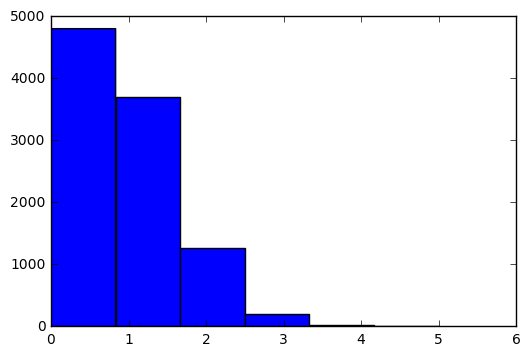

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

n = 10000 # ilość gier

wyniki = [play() for _ in range(n)] 
    
plt.hist(wyniki, 6)